# Assignment 6

In [7]:
# code from M06-A01

# (c) 2014 Reid Johnson and Everaldo Aguiar
#
# Functions to work with continuous data and linear regression models.

import matplotlib.pyplot as pl

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                #t = plt.title(name)
            i += 1

    pl.show()

In [8]:
# given code
import pandas as pd

fileURL = 'http://archive.ics.uci.edu/ml/\
machine-learning-databases/iris/iris.data'
iris = pd.read_csv(fileURL, names=['Sepal Length', 'Sepal Width', \
                                   'Petal Length', 'Petal Width', 
                                   'Species'], header=None)
iris = iris.dropna()

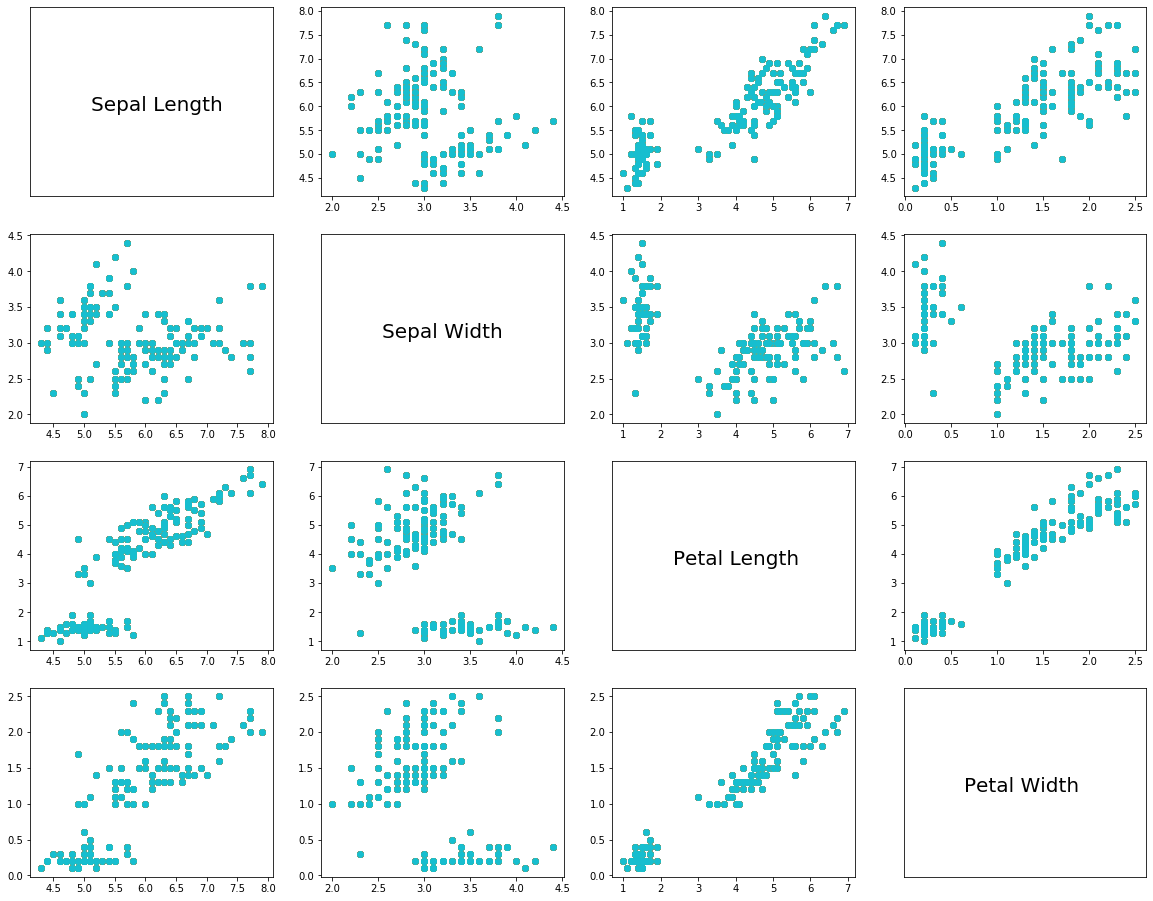

In [9]:
# A scatterplot matrix of scatterplots, with one scatterplot for each pairwise combination of features.
pairs(iris)

In [ ]:
# A plot of the linear regression models generated on each pairwise combination of features, 
# with corresponding model statistics.
def plot_linear_regression(iris, f1, f2):

In [ ]:
# A plot of the best overall linear regression model you were able to generate using any combination of features 
# (including the use of multiple features used in combination to predict a single feature), 
# with corresponding model statistics.
def 

# Questions
1. Based upon the linear models you generated, which pair of features appear to be most predictive for one another? Note that you can answer this question based upon the output provided for the linear models.
2. Suppose you tried to generate a classification model on this dataset, but only after remov- ing the feature that you were best able to predict based upon other features. How would removing this feature affect the classification performance?

# Answers
1. 
2. 